In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from keras.preprocessing.image import load_img

In [4]:
base_path = './chest_xray'

In [5]:
normal_img = "IM-0115-0001.jpeg"
pneumonia_img = "person3_bacteria_12.jpeg"

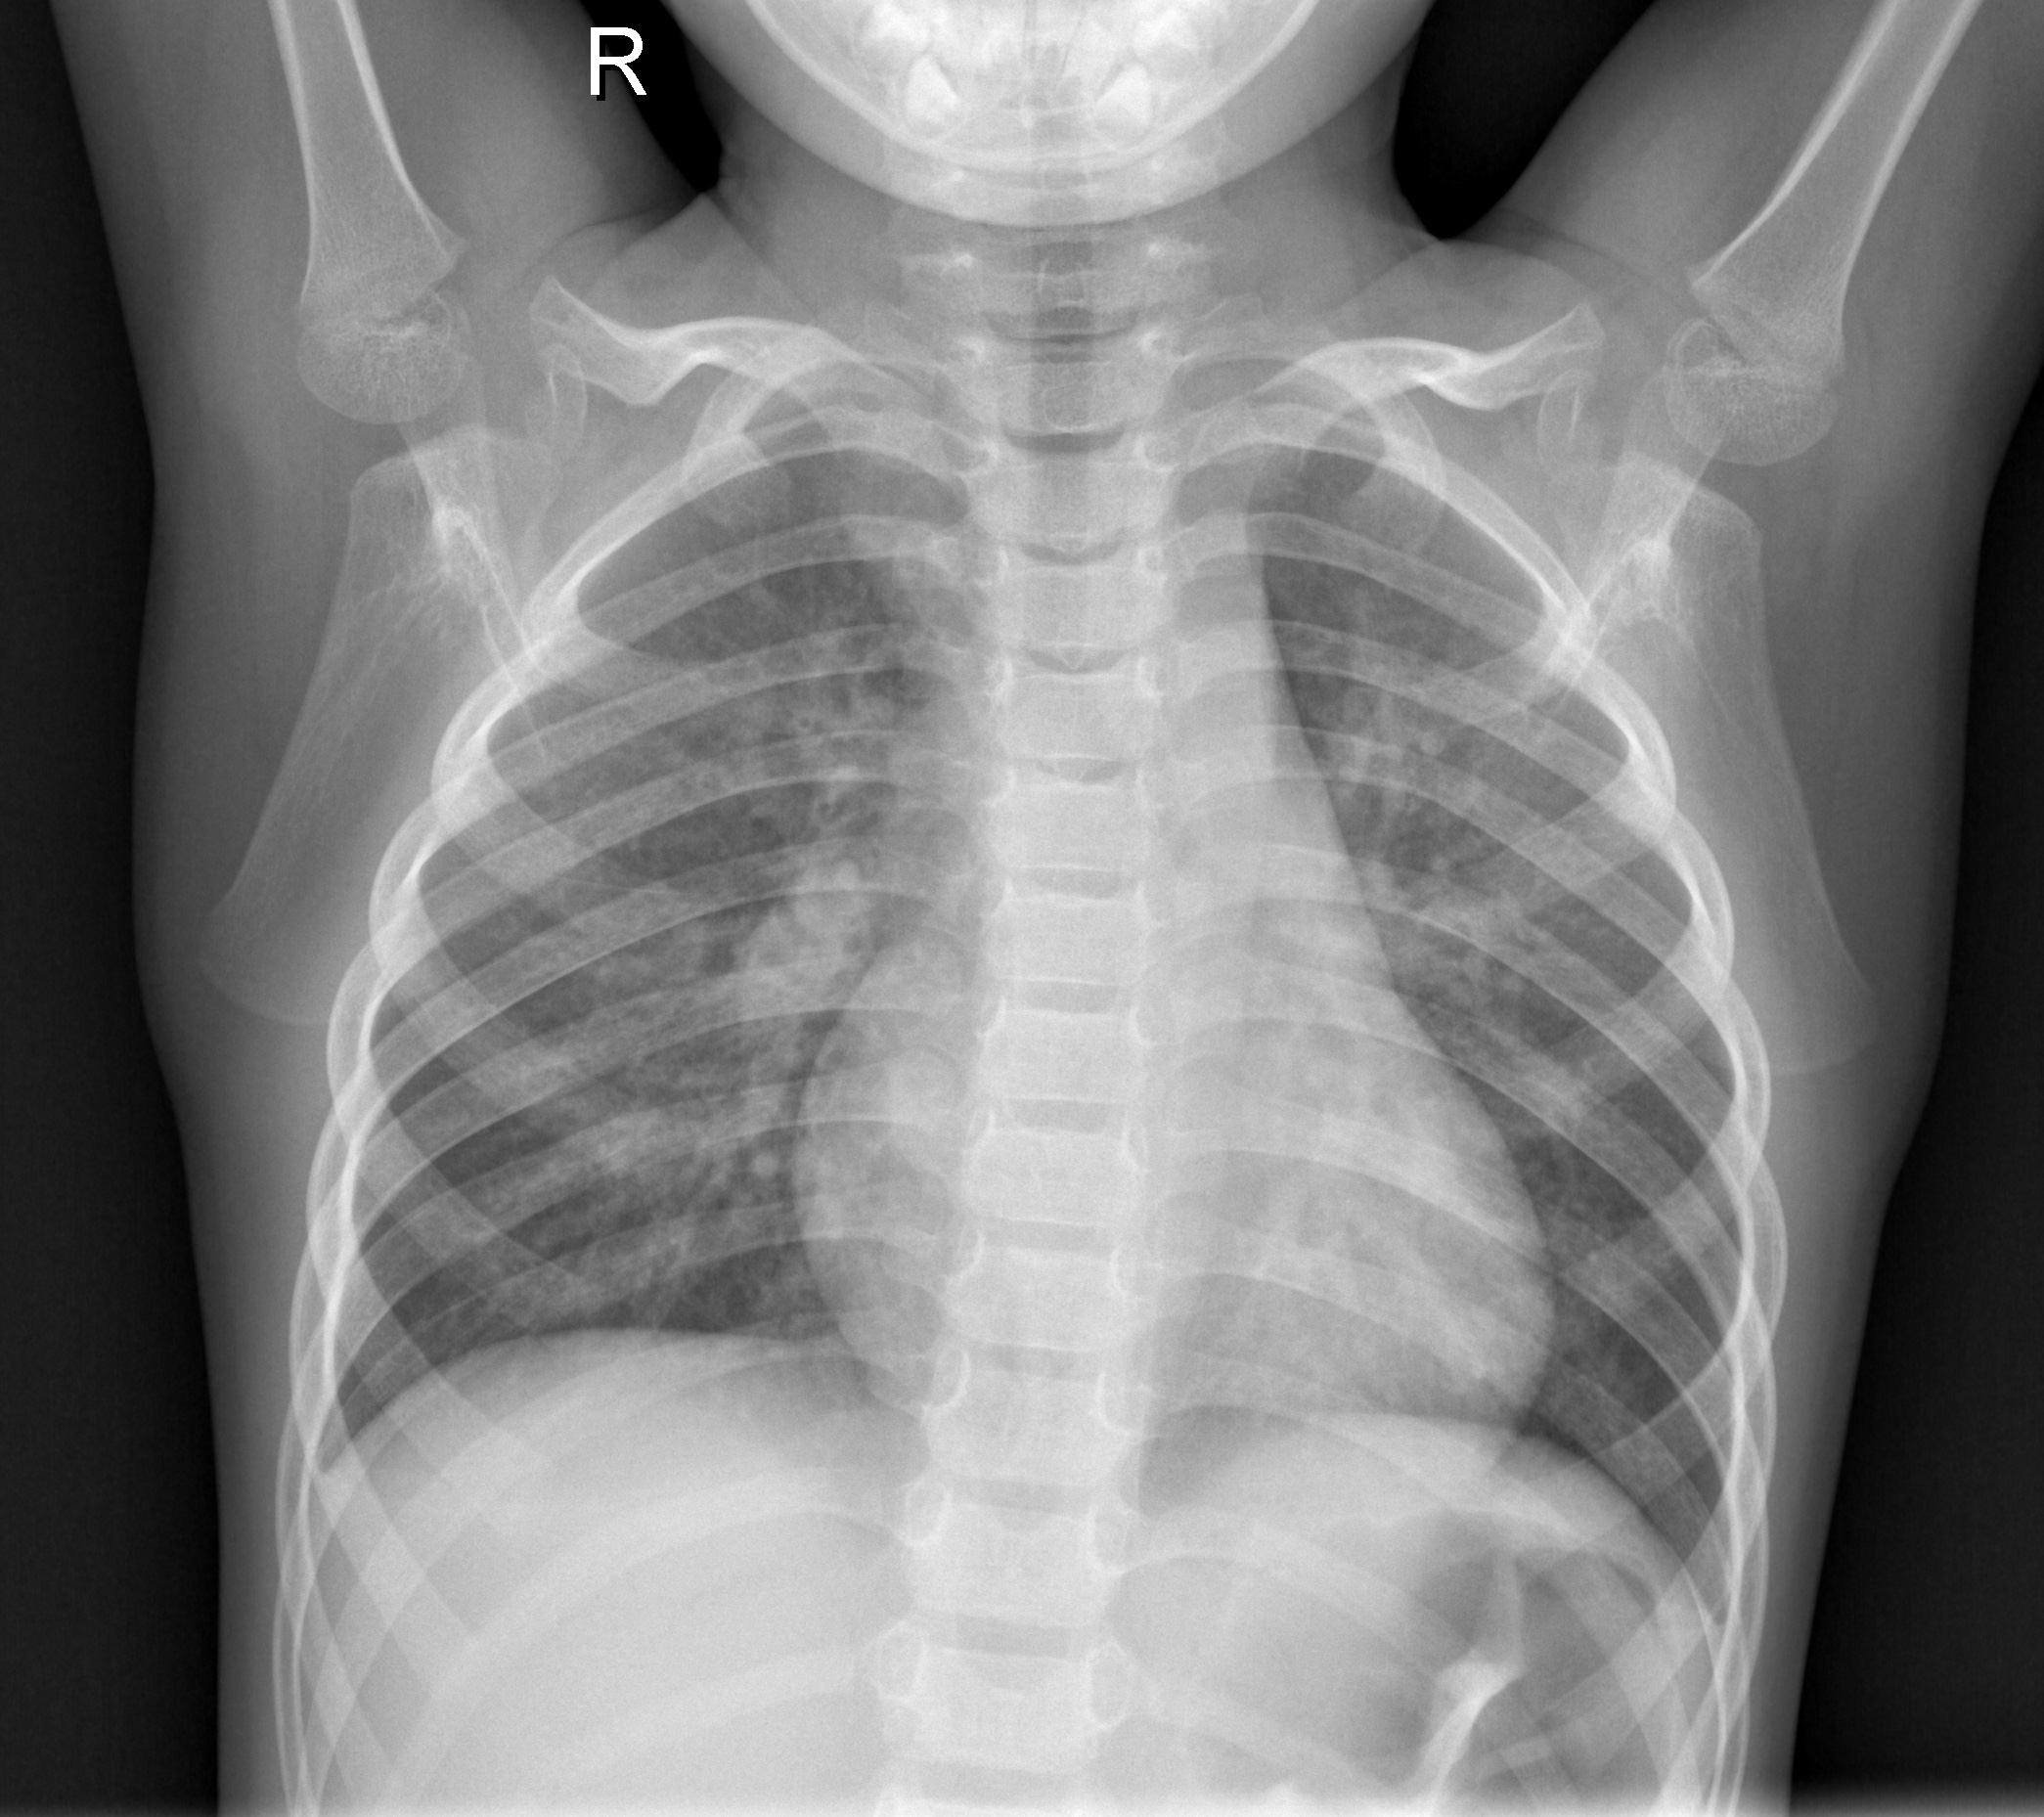

In [6]:
full_path = f"{base_path}/train/NORMAL/{normal_img}"
load_img(full_path)

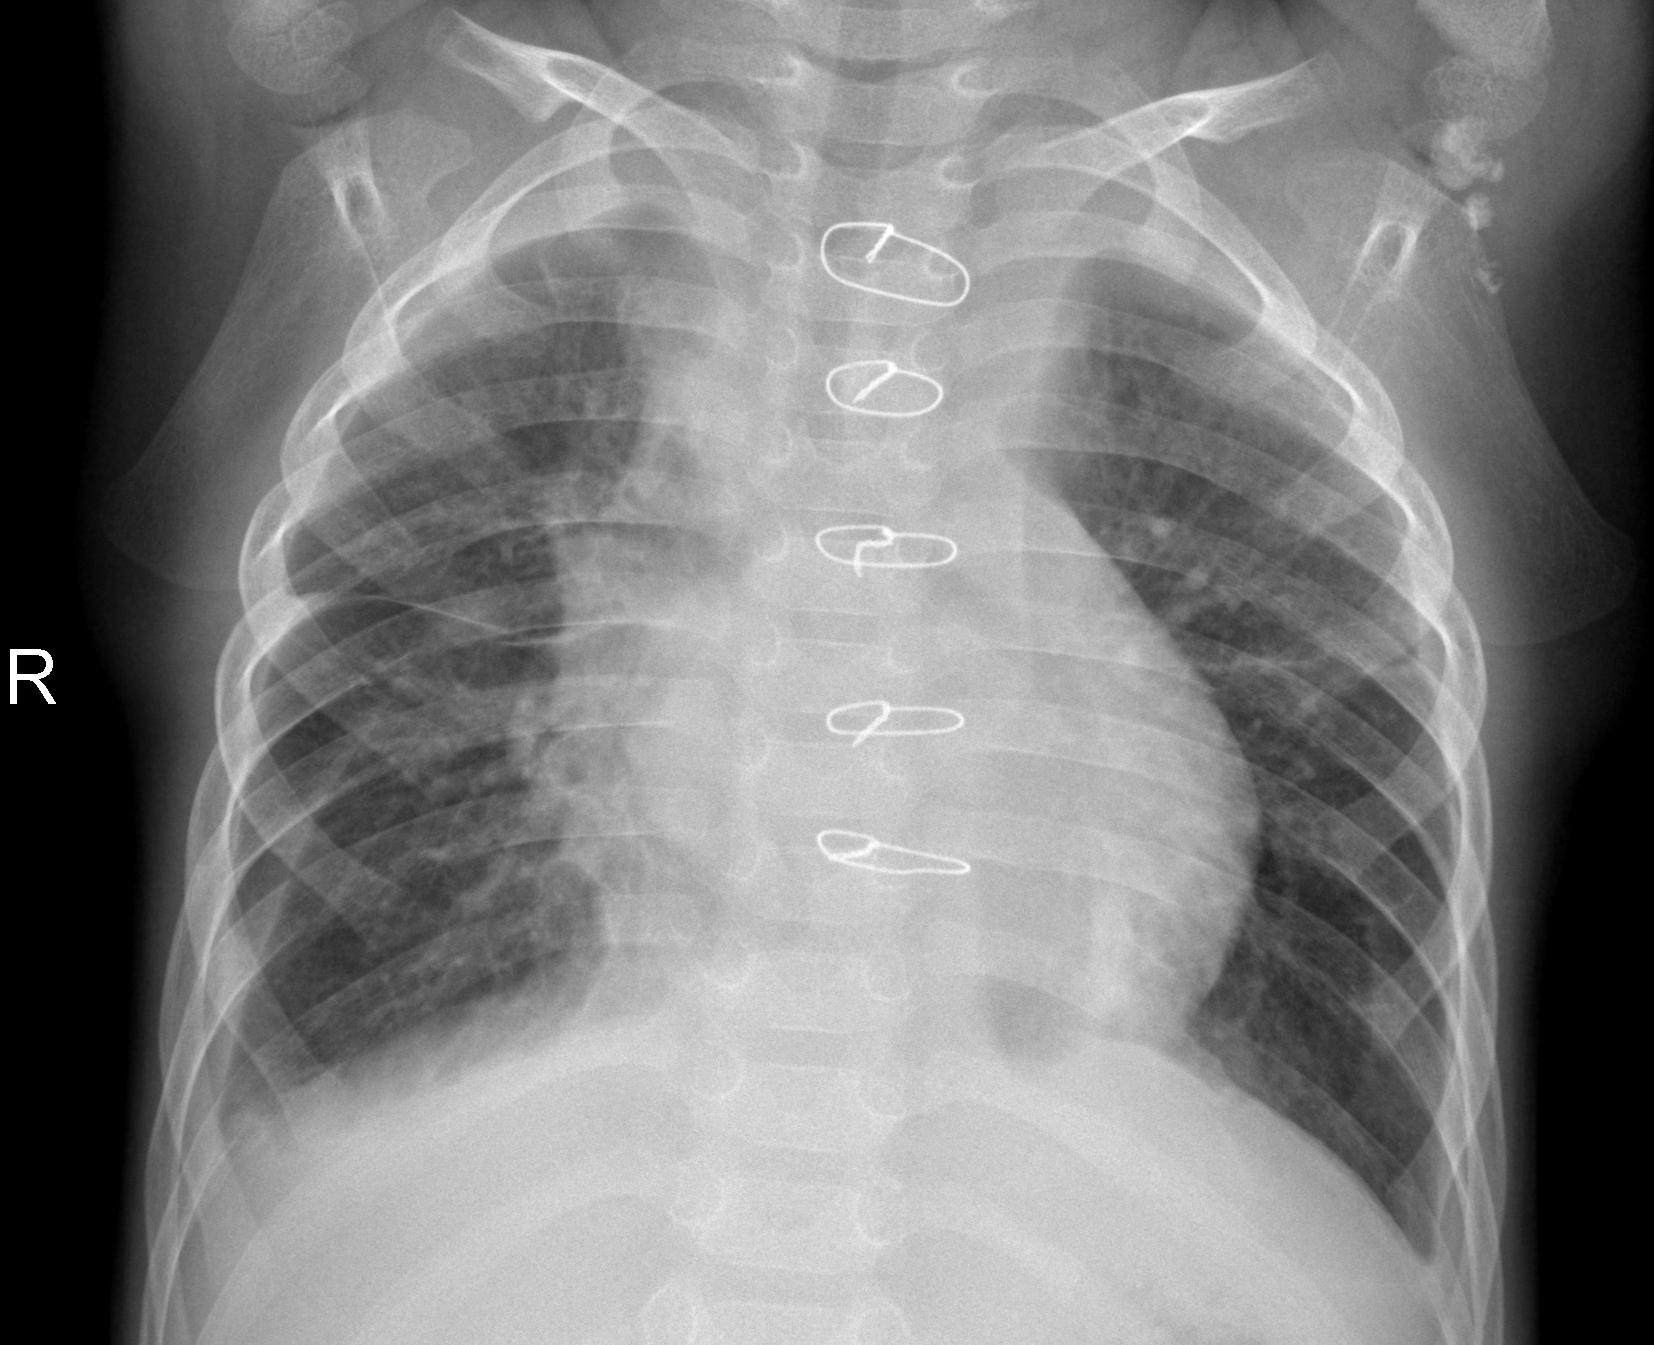

In [7]:
full_path = f"{base_path}/train/PNEUMONIA/{pneumonia_img}"
load_img(full_path)

## Prepare data

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_generator = ImageDataGenerator(rescale=1./255)

In [10]:
train_ds = train_generator.flow_from_directory(
    f'{base_path}/train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 5216 images belonging to 2 classes.


In [11]:
val_generator = ImageDataGenerator(rescale=1./255)

In [12]:
val_ds = val_generator.flow_from_directory(
    f'{base_path}/val',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 16 images belonging to 2 classes.


In [13]:
test_generator = ImageDataGenerator(rescale=1./255)

In [14]:
test_ds = test_generator.flow_from_directory(
    f'{base_path}/test',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=False
)

Found 624 images belonging to 2 classes.


In [15]:
test_generator_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Prepare augmented data

In [16]:
train_generator_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [17]:
train_ds_aug = train_generator_aug.flow_from_directory(
    f'{base_path}/train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 5216 images belonging to 2 classes.


In [18]:
val_generator_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [19]:
val_ds_aug = val_generator_aug.flow_from_directory(
    f'{base_path}/val',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 16 images belonging to 2 classes.


In [20]:
test_generator_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [21]:
test_ds_aug = test_generator_aug.flow_from_directory(
    f'{base_path}/test',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 624 images belonging to 2 classes.


## Model without pretrained weights and dropout

In [22]:
inputs = keras.Input(shape=(200, 200, 3))
conv = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
pool = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)
flat = keras.layers.Flatten()(pool)
dense = keras.layers.Dense(64, activation="relu")(flat)
outputs = keras.layers.Dense(1)(dense)

In [23]:
model_1 = keras.Model(inputs, outputs)
model_1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 313632)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      20,072,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()

In [25]:
model_1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [26]:
history_1 = model_1.fit(train_ds, epochs=10, validation_data=val_ds)

D:\projects\ml\pneumonia-prediction\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 116s 444ms/step - accuracy: 0.7333 - loss: 4.0458 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 119s 455ms/step - accuracy: 0.7400 - loss: 4.1444 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 140s 447ms/step - accuracy: 0.7313 - loss: 4.2842 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 119s 456ms/step - accuracy: 0.7442 - loss: 4.0782 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 116s 443ms/step - accuracy: 0.7392 - loss: 4.1573 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 120s 458ms/step - accuracy: 0.7369 - loss: 4.1941 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 119s 454ms/step - accuracy: 0.7409 - loss: 4.1301 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 119s 454ms/step - accuracy: 0.7482 -

In [27]:
test_loss_1, test_accuracy_1 = model_1.evaluate(test_ds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 268ms/step - accuracy: 0.2868 - loss: 11.3704     


In [28]:
history_1_aug = model_1.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.7456 - loss: 4.0564  

D:\projects\ml\pneumonia-prediction\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


261/261 ━━━━━━━━━━━━━━━━━━━━ 170s 650ms/step - accuracy: 0.7456 - loss: 4.0565 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 173s 663ms/step - accuracy: 0.7459 - loss: 4.0514 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 175s 670ms/step - accuracy: 0.7279 - loss: 4.3380 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 201s 667ms/step - accuracy: 0.7419 - loss: 4.1151 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 203s 671ms/step - accuracy: 0.7375 - loss: 4.1854 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 175s 670ms/step - accuracy: 0.7464 - loss: 4.0434 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 175s 671ms/step - accuracy: 0.7281 - loss: 4.3347 - val_accuracy: 0.5000 - val_loss: 7.9712
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 177s 678ms/step - accuracy: 0.7383 - loss: 4.17

In [29]:
test_loss_1_aug, test_accuracy_1_aug = model_1.evaluate(test_ds_aug)

32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 480ms/step - accuracy: 0.6151 - loss: 6.1359


## Model without pretrained weights, but with multiple convolutional layers and dropout

In [30]:
inputs = keras.Input(shape=(200, 200, 3))
conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(pool1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(pool2)
pool3 = keras.layers.MaxPool2D(pool_size=(2, 2))(conv3)

flat = keras.layers.Flatten()(pool3)
dense1 = keras.layers.Dense(128, activation="relu")(flat)
dropout = keras.layers.Dropout(0.5)(dense1)
outputs = keras.layers.Dense(1, activation="sigmoid")(dropout)

In [31]:
model_2 = keras.Model(inputs, outputs)

In [32]:
model_2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      10,240,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,333,505 (39.42 MB)

 Trainable params: 10,333,505 (39.42 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()

In [34]:
model_2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history_2 = model_2.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 149s 564ms/step - accuracy: 0.7870 - loss: 0.4780 - val_accuracy: 0.8750 - val_loss: 0.4000
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 154s 588ms/step - accuracy: 0.9452 - loss: 0.1576 - val_accuracy: 0.8125 - val_loss: 0.3469
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 158s 604ms/step - accuracy: 0.9657 - loss: 0.1063 - val_accuracy: 0.9375 - val_loss: 0.1948
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 158s 604ms/step - accuracy: 0.9620 - loss: 0.0920 - val_accuracy: 0.9375 - val_loss: 0.1061
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 199s 593ms/step - accuracy: 0.9693 - loss: 0.0794 - val_accuracy: 0.9375 - val_loss: 0.0656
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 155s 595ms/step - accuracy: 0.9797 - loss: 0.0524 - val_accuracy: 0.8750 - val_loss: 0.2353
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 153s 586ms/step - accuracy: 0.9832 - loss: 0.0453 - val_accuracy: 1.0000 - val_loss: 0.1156
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 145s 556ms/step - accuracy: 0.9804 -

In [35]:
test_loss_2, test_accuracy_2 = model_2.evaluate(test_ds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 333ms/step - accuracy: 0.6276 - loss: 2.4618


In [36]:
history_2_aug = model_2.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 224s 860ms/step - accuracy: 0.8855 - loss: 0.3040 - val_accuracy: 0.6250 - val_loss: 1.6856
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 224s 856ms/step - accuracy: 0.9331 - loss: 0.1773 - val_accuracy: 0.6250 - val_loss: 1.3567
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 261s 854ms/step - accuracy: 0.9238 - loss: 0.1815 - val_accuracy: 0.7500 - val_loss: 0.4825
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 218s 834ms/step - accuracy: 0.9421 - loss: 0.1523 - val_accuracy: 0.8125 - val_loss: 0.7590
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 265s 843ms/step - accuracy: 0.9369 - loss: 0.1607 - val_accuracy: 0.6875 - val_loss: 1.5487
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 212s 810ms/step - accuracy: 0.9511 - loss: 0.1264 - val_accuracy: 0.8750 - val_loss: 0.4794
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 216s 825ms/step - accuracy: 0.9313 - loss: 0.1679 - val_accuracy: 0.6875 - val_loss: 0.7168
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 214s 819ms/step - accuracy: 0.9552 -

In [37]:
test_loss_2_aug, test_accuracy_2_aug = model_2.evaluate(test_ds_aug)

32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 550ms/step - accuracy: 0.7358 - loss: 1.0206


### Add batch normalization to the this architecture

In [38]:
inputs = keras.Input(shape=(200, 200, 3))
conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
bn1 = keras.layers.BatchNormalization()(conv1)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(bn1)

conv2 = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(pool1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(pool2)
pool3 = keras.layers.MaxPool2D(pool_size=(2, 2))(conv3)

flat = keras.layers.Flatten()(pool3)
dense1 = keras.layers.Dense(128, activation="relu")(flat)
dropout = keras.layers.Dropout(0.5)(dense1)
outputs = keras.layers.Dense(1, activation="sigmoid")(dropout)

In [39]:
model_3 = keras.Model(inputs, outputs)

In [40]:
model_3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 200, 200, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      10,240,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,333,633 (39.42 MB)

 Trainable params: 10,333,569 (39.42 MB)

 Non-trainable params: 64 (256.00 B)

In [41]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()

In [42]:
model_3.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history_3 = model_3.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 177s 669ms/step - accuracy: 0.8547 - loss: 0.3742 - val_accuracy: 0.6250 - val_loss: 0.5633
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 183s 700ms/step - accuracy: 0.9521 - loss: 0.1248 - val_accuracy: 0.6875 - val_loss: 0.4819
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 203s 704ms/step - accuracy: 0.9675 - loss: 0.0889 - val_accuracy: 0.9375 - val_loss: 0.1571
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 204s 713ms/step - accuracy: 0.9783 - loss: 0.0634 - val_accuracy: 0.8125 - val_loss: 0.3618
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 187s 714ms/step - accuracy: 0.9857 - loss: 0.0392 - val_accuracy: 1.0000 - val_loss: 0.0540
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 187s 714ms/step - accuracy: 0.9836 - loss: 0.0403 - val_accuracy: 1.0000 - val_loss: 0.1001
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.9895 - loss: 0.0325 - val_accuracy: 0.9375 - val_loss: 0.1869
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 180s 687ms/step - accuracy: 0.9899 - lo

In [43]:
test_loss_3, test_accuracy_3 = model_3.evaluate(test_ds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 357ms/step - accuracy: 0.5702 - loss: 4.3172


In [45]:
history_3_aug = model_3.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 249s 954ms/step - accuracy: 0.8948 - loss: 0.2834 - val_accuracy: 0.6875 - val_loss: 0.8317
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 250s 959ms/step - accuracy: 0.9255 - loss: 0.1984 - val_accuracy: 0.6250 - val_loss: 0.8697
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 261s 998ms/step - accuracy: 0.9404 - loss: 0.1563 - val_accuracy: 0.6875 - val_loss: 1.0879
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 256s 981ms/step - accuracy: 0.9404 - loss: 0.1460 - val_accuracy: 0.6250 - val_loss: 0.7491
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 258s 986ms/step - accuracy: 0.9495 - loss: 0.1404 - val_accuracy: 0.7500 - val_loss: 0.5061
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 258s 988ms/step - accuracy: 0.9523 - loss: 0.1232 - val_accuracy: 0.5000 - val_loss: 1.1507
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 260s 994ms/step - accuracy: 0.9510 - loss: 0.1348 - val_accuracy: 0.5625 - val_loss: 1.4445
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 253s 969ms/step - accuracy: 0.9506 -

In [46]:
test_loss_3_aug, test_accuracy_3_aug = model_3.evaluate(test_ds_aug)

32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 578ms/step - accuracy: 0.6460 - loss: 2.6757


## Model with pre-trained weights

In [47]:
from tensorflow.keras.applications.xception import Xception

In [48]:
base_model = Xception(
    weights='imagenet', 
    include_top=False,
    input_shape=(200, 200, 3)
)

In [49]:
base_model.trainable = False

In [50]:
inputs = keras.Input(shape=(200, 200, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(1, activation="sigmoid")(vectors)

model_4 = keras.Model(inputs, outputs)

In [51]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()

In [52]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()

In [53]:
model_4.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [54]:
model_4.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [56]:
history_4 = model_4.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.9149 - loss: 0.2206 - val_accuracy: 0.5625 - val_loss: 0.5437
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.9622 - loss: 0.1023 - val_accuracy: 0.7500 - val_loss: 0.4664
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.9685 - loss: 0.0912 - val_accuracy: 0.8125 - val_loss: 0.4923
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.9606 - loss: 0.0938 - val_accuracy: 0.6875 - val_loss: 0.5159
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 386s 1s/step - accuracy: 0.9674 - loss: 0.0884 - val_accuracy: 0.8750 - val_loss: 0.3268
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - accuracy: 0.9731 - loss: 0.0716 - val_accuracy: 0.8750 - val_loss: 0.2657
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 304s 1s/step - accuracy: 0.9734 - loss: 0.0738 - val_accuracy: 0.8125 - val_loss: 0.4983
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.9712 - loss: 0.0694 - val_accu

In [57]:
test_loss_4, test_accuracy_4 = model_4.evaluate(test_ds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6352 - loss: 1.2189


In [58]:
history_4_aug = model_4.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.9433 - loss: 0.1361 - val_accuracy: 0.7500 - val_loss: 0.3882
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.9633 - loss: 0.0997 - val_accuracy: 0.7500 - val_loss: 0.3856
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step - accuracy: 0.9624 - loss: 0.1037 - val_accuracy: 0.6875 - val_loss: 0.7298
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 398s 1s/step - accuracy: 0.9599 - loss: 0.1026 - val_accuracy: 0.6875 - val_loss: 1.0768
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 366s 1s/step - accuracy: 0.9631 - loss: 0.1023 - val_accuracy: 0.7500 - val_loss: 0.6434
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 359s 1s/step - accuracy: 0.9623 - loss: 0.0970 - val_accuracy: 0.8125 - val_loss: 0.2914
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.9655 - loss: 0.0892 - val_accuracy: 0.6250 - val_loss: 0.5389
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.9652 - loss: 0.0909 - val_accu

In [59]:
test_loss_4_aug, test_accuracy_4_aug = model_4.evaluate(test_ds_aug)

32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8712 - loss: 0.3377


## Model with pre-trained weights and dropout

In [60]:
inputs = keras.Input(shape=(200, 200, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
dense1 = keras.layers.Dense(128, activation='relu')(vectors)
dropout = keras.layers.Dropout(0.5)(dense1)
outputs = keras.layers.Dense(1, activation='sigmoid')(dropout)

In [61]:
model_5 = keras.Model(inputs, outputs)

In [62]:
model_5.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,123,881 (80.58 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [63]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()

In [64]:
model_5.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [65]:
model_5.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,123,881 (80.58 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [66]:
history_5 = model_5.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.8708 - loss: 0.2908 - val_accuracy: 0.8750 - val_loss: 0.2938
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.9535 - loss: 0.1320 - val_accuracy: 0.8750 - val_loss: 0.3667
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.9563 - loss: 0.1214 - val_accuracy: 0.8125 - val_loss: 0.4904
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.9561 - loss: 0.1220 - val_accuracy: 0.8750 - val_loss: 0.2645
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.9611 - loss: 0.1046 - val_accuracy: 0.9375 - val_loss: 0.2411
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.9616 - loss: 0.1013 - val_accuracy: 0.8750 - val_loss: 0.2814
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - accuracy: 0.9639 - loss: 0.0967 - val_accuracy: 0.6875 - val_loss: 0.5991
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.9589 - loss: 0.1024 - val_accu

In [67]:
test_loss_5, test_accuracy_5 = model_5.evaluate(test_ds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.6125 - loss: 1.3401


In [68]:
history_5_aug = model_5.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 368s 1s/step - accuracy: 0.9470 - loss: 0.1419 - val_accuracy: 0.6250 - val_loss: 0.9744
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1082s 4s/step - accuracy: 0.9544 - loss: 0.1209 - val_accuracy: 0.8125 - val_loss: 0.4212
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 392s 1s/step - accuracy: 0.9541 - loss: 0.1161 - val_accuracy: 0.6875 - val_loss: 0.7977
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 377s 1s/step - accuracy: 0.9552 - loss: 0.1131 - val_accuracy: 0.7500 - val_loss: 0.3874
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.9520 - loss: 0.1267 - val_accuracy: 0.6250 - val_loss: 0.8452
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 407s 1s/step - accuracy: 0.9563 - loss: 0.1186 - val_accuracy: 0.6875 - val_loss: 1.2369
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 351s 1s/step - accuracy: 0.9592 - loss: 0.1021 - val_accuracy: 0.6875 - val_loss: 0.6451
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 364s 1s/step - accuracy: 0.9589 - loss: 0.1127 - val_acc

In [69]:
test_loss_5_aug, test_accuracy_5_aug = model_5.evaluate(test_ds_aug)

32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8433 - loss: 0.4468


In [70]:
models_dict = {
    "model_1": test_accuracy_1_aug,
    "model_2": test_accuracy_2_aug,
    "model_3": test_accuracy_3_aug,
    "model_4": test_accuracy_4_aug,
    "model_5": test_accuracy_5_aug
}

In [78]:
sorted_dict = sorted(models_dict.items(), key=lambda x:x[1])

In [79]:
sorted_dict

[('model_1', 0.625),
 ('model_3', 0.6474359035491943),
 ('model_2', 0.7419871687889099),
 ('model_5', 0.8397436141967773),
 ('model_4', 0.8621794581413269)]

The model 4 is the best performing model, so it will be used in the production

## Convert model 4 to TFLite